## List of tables:


### 1. [Table 3: Treatment effects on quantity](#quantity)

## List of figures:

### 1. [Figure 2: Fragments submitted](#icdf)


#### Imports libraries

In [1]:
import matplotlib.pyplot as plt  # Plotting
import numpy as np  # Matrix algebra
import os  # File system handling
import pandas as pd  # Dataframe handling
import statsmodels.formula.api as smf  # Regressions analysis

from matplotlib.ticker import FuncFormatter  # Formating graphs
from scipy import stats  # Statistics module
from statsmodels.iolib.summary2 import summary_col  # Regression output table
from statsmodels.stats.anova import anova_lm  # Regression anova table
from statsmodels.stats.multicomp import MultiComparison  # Multi-comparisson tests

#### Set project directory

In [2]:
PROJECT_FOLDER = os.path.dirname(os.path.dirname(os.getcwd()))
FINAL_DATA_FOLDER = os.path.join(PROJECT_FOLDER, 'data', 'final')
TABLES_FOLDER = os.path.join(PROJECT_FOLDER, 'reports', 'tables')
FIGURES_FOLDER = os.path.join(PROJECT_FOLDER, 'reports', 'figures')

#### Pandas options

In [3]:
pd.set_option("display.precision", 3)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.max_rows", 40)

#### Set plotting style

In [4]:
plt.style.use('classic')

#### Set plotting properties 

In [5]:
bar_kw = dict(kind='bar', color='0.4', alpha=0.8, lw=0.5, width=0.7)
line_kw = dict(kind='line', lw=1, alpha=1, legend=True)
font_kw = dict(fontsize=11, color='k')
grid_kw = dict(linewidth=1, axis="y", zorder=2, antialiased=True)
xlab_kw = dict(fontsize=11, labelpad=3)
ylab_kw = dict(fontsize=11, labelpad=3)
error_kw = dict(elinewidth=2, ecolor='0.15')
legend_kw = dict(frameon=False)
tick_kw = dict(
    size=5,
    which='both',
    direction='out',
    right=False,
    top=False,
    labelbottom=True
)

#### Retrieving dataframe

In [6]:
DATA = os.path.join(
    FINAL_DATA_FOLDER, 
    'experiment_1',                
    'data_final.feather'
)

df = pd.read_feather(DATA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Columns: 443 entries, Age to Q80_timer
dtypes: float64(225), int64(26), object(192)
memory usage: 10.4+ MB


#### Seperate quality-concern treatments from the following analysys

In [7]:
sel = (df['Dataset'] == 'Main')
df = df[sel]

#### Group datasets according to treatments

In [8]:
grouped_all = df.groupby('Treatment_str')
grouped_first = df.groupby('Performance_pay')
grouped_second = df.groupby('Leadership_technique')

#### Make ordered treatment labels

In [9]:
treat_index = [
    'No piece rate + No message',
    'No piece rate + Praise',
    'No piece rate + Reference point',
    'Low piece rate + No message',
    'Low piece rate + Praise',
    'Low piece rate + Reference point',
    'High piece rate + No message',
    'High piece rate + Praise',
    'High piece rate + Reference point',
]

#### Check for differences in the number of empty submissions across treatments <a href='' id='counter_empty'></a>

In [10]:
regs = {}
regs['reg1'] = 'Counter_empty ~ Low_piece_rate + High_piece_rate'
regs['reg2'] = 'Counter_empty ~ Praise + Reference_point'
regs['reg3'] = 'Counter_empty ~ (Low_piece_rate + High_piece_rate) * (Praise + Reference_point)'
regs['reg4'] = regs['reg3'] + ' + Age + Female + Education + Mobile_device + Latin_med'

ols_results = [smf.ols(formula=v, data=df).fit(cov_type='HC1') for v in regs.values()]

order = [
    'Low_piece_rate',
    'High_piece_rate',
    'Praise',
    'Reference_point',
    'Low_piece_rate:Praise',
    'High_piece_rate:Praise',
    'Low_piece_rate:Reference_point',
    'High_piece_rate:Reference_point',
    'Age',
    'Female',
    'Education',
    'Mobile_device',
    'Latin_med',
    'Intercept',
]

auxiliary = {
    'N': lambda x: f'{x.nobs:.0f}',
    'F': lambda x: f'{x.fvalue:.3f}', 
    'P(>F)': lambda x: f'{x.f_pvalue:.3f}',
}

summary = summary_col(
    ols_results,
    stars=True,
    info_dict=auxiliary,
    float_format='%.3f',
    regressor_order=order,
    drop_omitted=True
)

summary = summary\
    .tables[0]\
    .rename(mapper=lambda x: x.replace('_', ' ').replace(':', ' * ').capitalize(), axis=0)\
    .rename(mapper=lambda x: x.capitalize().split()[0].replace('_', ' '), axis=1)\
    .rename({'Counter empty': 'No. empty fragments'}, axis=1)\
    .rename({'Latin med': 'Latin'}, axis=0)\
    .rename_axis('Dependent variable:', axis=1)

summary

Dependent variable:,No. empty fragments,No. empty fragments,No. empty fragments,No. empty fragments
Low piece rate,0.070,,0.051,0.052
,(0.064),,(0.059),(0.059)
High piece rate,0.030,,0.003,0.005
,(0.028),,(0.016),(0.017)
Praise,,-0.008,0.001,-0.000
,,(0.021),(0.013),(0.014)
Reference point,,0.084,0.030,0.031
,,(0.069),(0.028),(0.027)
Low piece rate * praise,,,-0.049,-0.043
,,,(0.060),(0.063)


#### Histogram for number of sentences submitted  <a id='histogram_counter_real'></a>

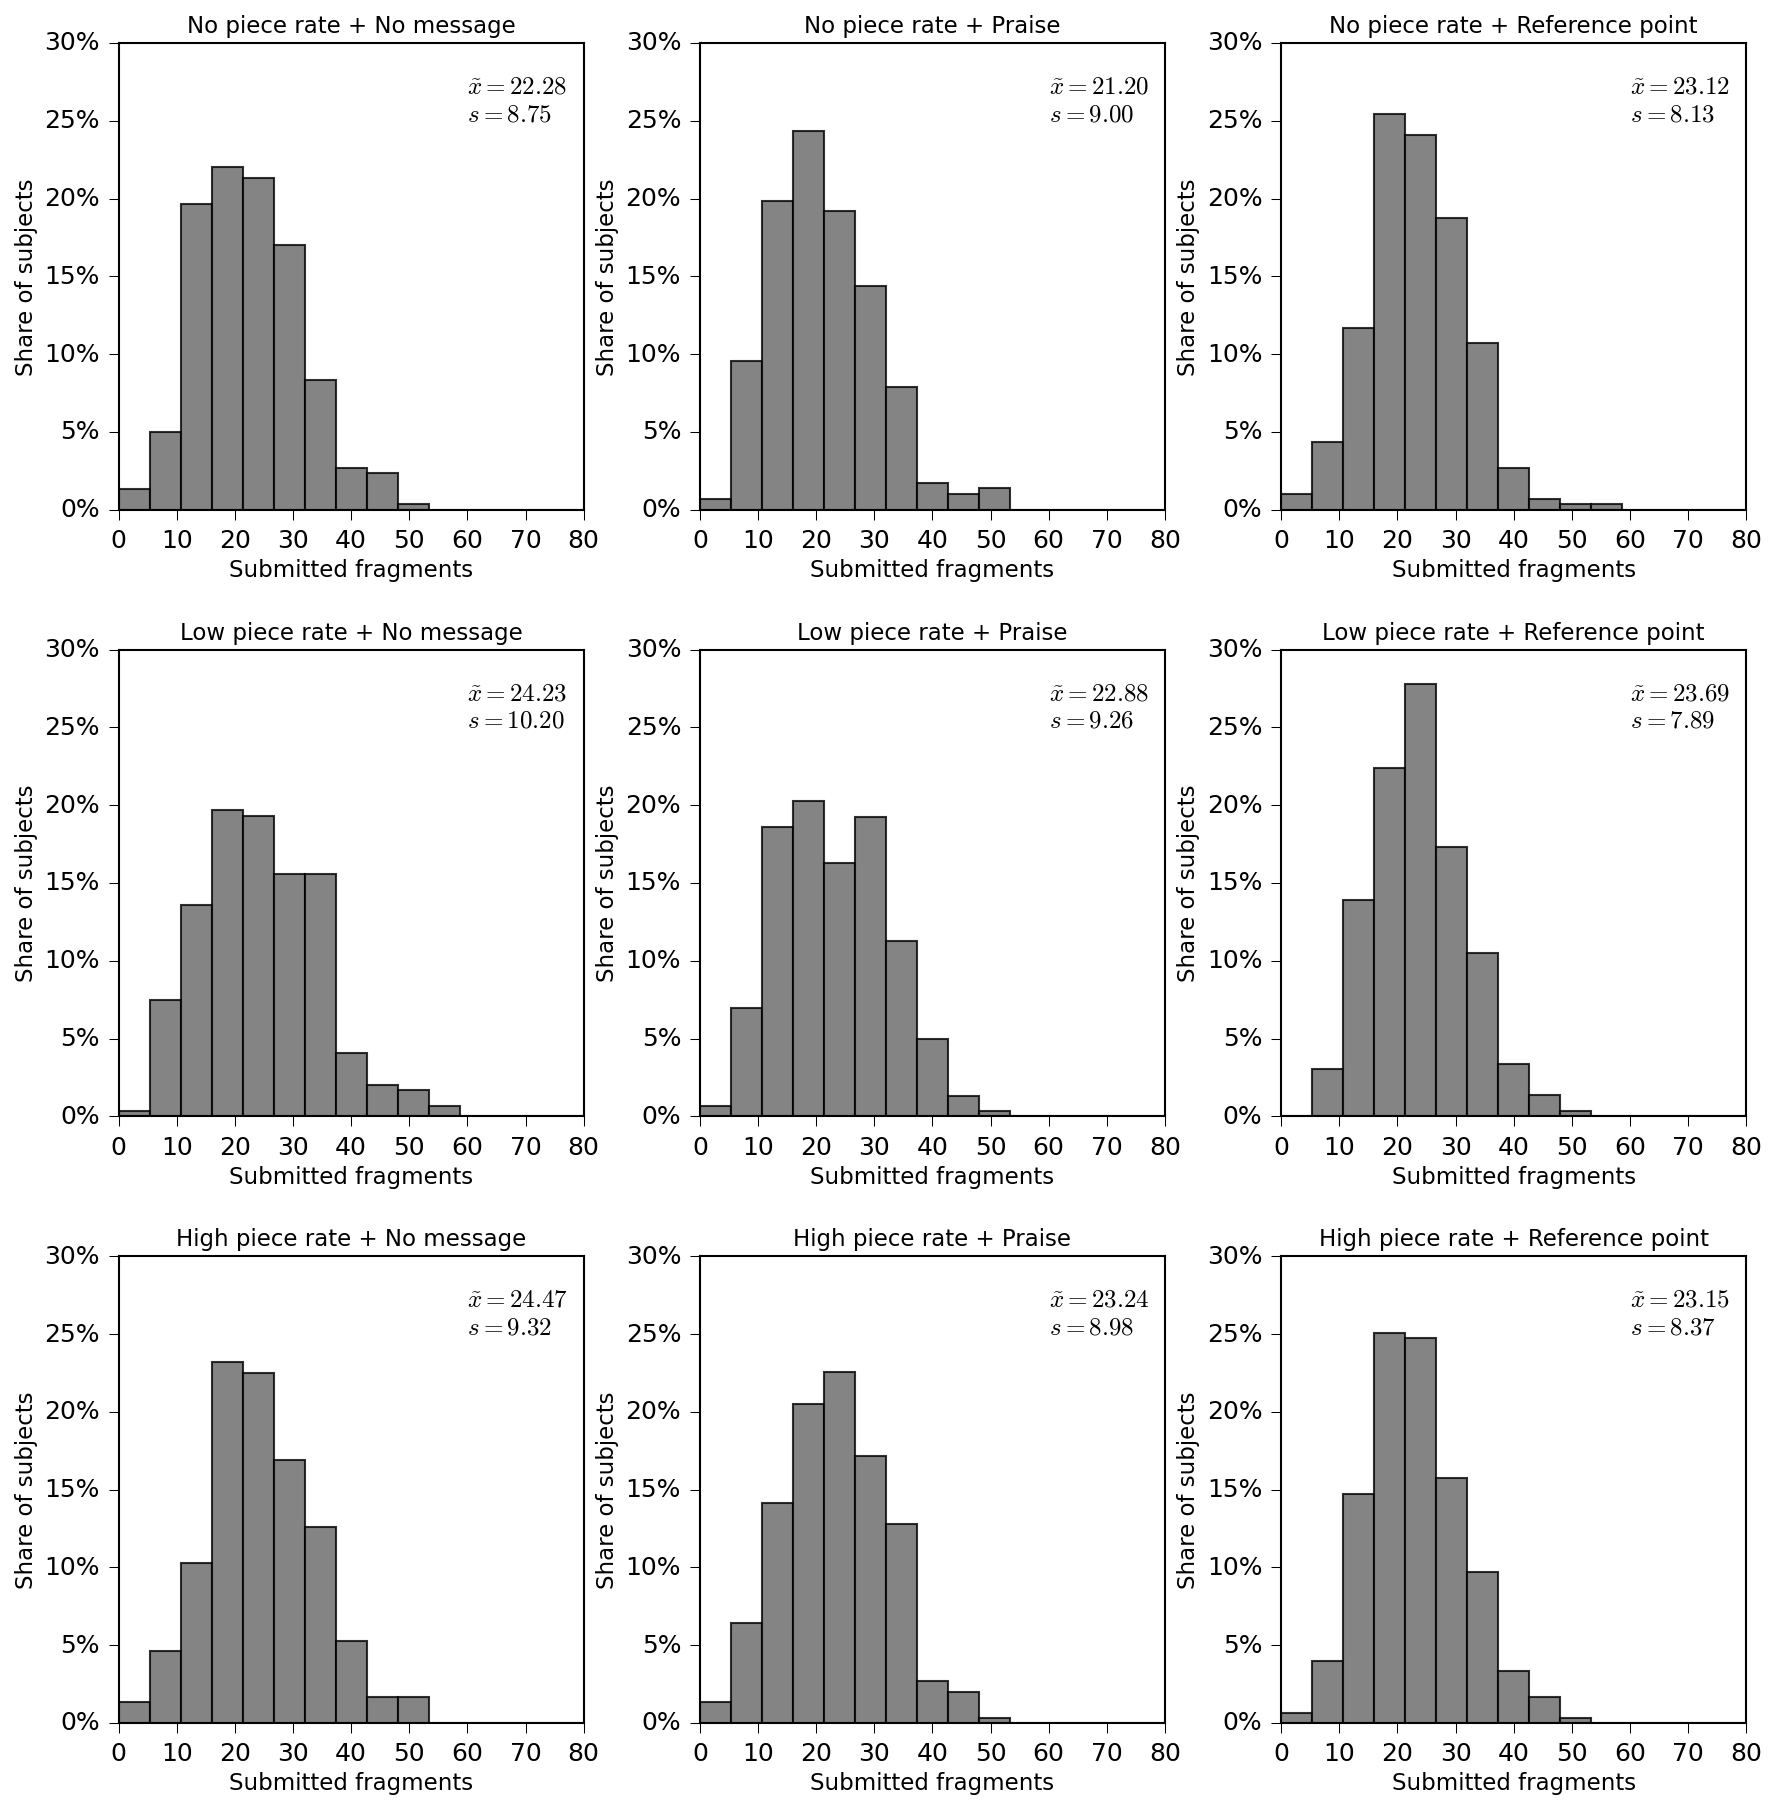

In [11]:
common_params = dict(bins=15, range=(0, 80), color='0.4', alpha=0.8, grid=False)
fig, axis = plt.subplots(3, 3, figsize=(14, 14), dpi=150, facecolor='w')
fig.subplots_adjust(hspace=0.3, wspace=0.25)
for i, ax in enumerate(fig.axes):     
    df_hist = df[df['Treatment_str'] == treat_index[i]]['Counter_real']
    df_hist.hist(ax=ax, weights=np.ones(len(df_hist)) / len(df_hist), **common_params)
    ax.set_ylim(0, 0.3)
    ax.set_title(treat_index[i].replace('Neutral', 'No message'), **font_kw)
    ax.tick_params(**tick_kw)
    ax.set_xlabel("Submitted fragments", **xlab_kw)
    ax.set_ylabel("Share of subjects", **ylab_kw)
    ax.yaxis.set_major_formatter(FuncFormatter('{:.0%}'.format))
    mean, std = df_hist.mean(), df_hist.std()
    ax.text(60, 0.25 , f"$\~{{x}}={mean:.2f}$\n$s={std:.2f}$")

path = os.path.join(
    FIGURES_FOLDER, 
    'experiment_1',
    'counter_real_hist.pdf'
)    
fig.savefig(path, bbox_inches='tight')

#### Share of workers at or above production target (more or equal to 25 submissions):

In [12]:
grouped_all['Counter_real']\
    .apply(lambda x: len(x[x >= 25]) / len(x))\
    .to_frame()\
    .rename_axis('Treatment')\
    .rename({'Counter_real': 'Share'}, axis=1)

,Share
Treatment,
High piece rate + No message,0.487
High piece rate + Praise,0.441
High piece rate + Reference point,0.408
Low piece rate + No message,0.458
Low piece rate + Praise,0.452
Low piece rate + Reference point,0.447
No piece rate + No message,0.390
No piece rate + Praise,0.336
No piece rate + Reference point,0.431


In [13]:
grouped_second['Counter_real']\
    .apply(lambda x: len(x[x >= 25]) / len(x))\
    .to_frame()\
    .rename_axis('Treatment')\
    .rename({'Counter_real': 'Share'}, axis=1)

,Share
Treatment,
No message,0.445
Praise,0.410
Reference point,0.429


####  Plotting inverse cumulutative distribution function for number of fragments submitted <a id='icdf'></a>

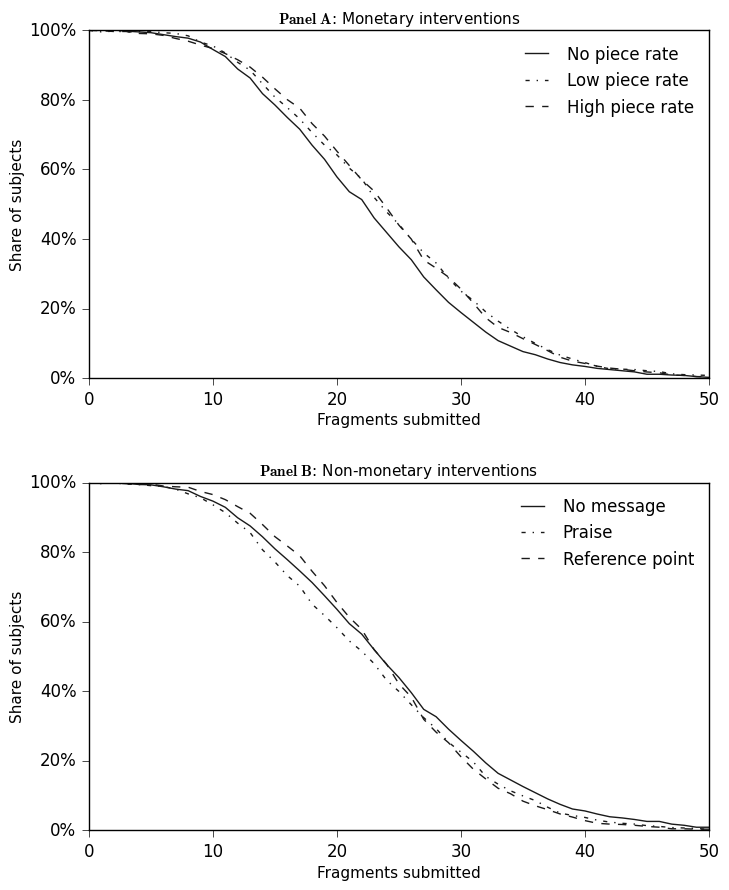

In [14]:
columns = [f'Q{x}_answer' for x in range(1, df['Counter_real'].max() + 1)]

df_counter_first = grouped_first[columns]\
    .count()\
    .transpose()\
    .rename_axis('', axis=1)\
    .reset_index(drop=True)\
    .sort_index(axis=1, ascending=False)\
    .apply(lambda x: x/x.loc[0], axis=0)

df_counter_second = grouped_second[columns]\
    .count()\
    .transpose()\
    .rename_axis('', axis=1)\
    .reset_index(drop=True)\
    .sort_index(axis=1, ascending=False)\
    .apply(lambda x: x/x.loc[0], axis=0)\
    .sort_index(axis=1)
    
fig, axis = plt.subplots(nrows=2, figsize=(8, 10), dpi=100, facecolor='w')
fig.subplots_adjust(hspace=0.30)
axis[0].set_title('$\mathbf{Panel \ A}$: Monetary interventions', **font_kw)
axis[1].set_title('$\mathbf{Panel \ B}$: Non-monetary interventions', **font_kw)
df_counter_first.plot(ax=axis[0], color='0.1', style=['-', '-.', '--'])
df_counter_second.plot(ax=axis[1], color='0.1', style=['-', '-.', '--'])
for ax in axis:
    ax.tick_params(**tick_kw)
    ax.set_xlabel("Fragments submitted", **xlab_kw)
    ax.set_ylabel("Share of subjects", **ylab_kw)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax.set_ylim(0.0, 1.0) 
    ax.set_xlim(0.0, 50)
    ax.legend(frameon=False, shadow=True, fontsize='medium')

path = os.path.join(
    FIGURES_FOLDER, 
    'experiment_1',
    'icdf.pdf'
)    
fig.savefig(path, bbox_inches='tight')

#### Cross tabulate average number of fragments submitted

In [15]:
counter_cross = pd.crosstab(
    df['Performance_pay'],
    df['Leadership_technique'],
    values= df['Counter_real'],
    aggfunc='mean',
    margins=True
    )\
    .sort_index(axis=0, ascending=False)\
    .style.format("{:.2f}")

counter_cross

Leadership_technique,No message,Praise,Reference point,All
Performance_pay,,,,
No piece rate,22.28,21.20,23.12,22.21
Low piece rate,24.23,22.88,23.69,23.60
High piece rate,24.47,23.24,23.15,23.62
All,23.66,22.45,23.32,23.14


#### Compare average number of fragments submitted by performance pay

In [16]:
counter_first = grouped_first['Counter_real']\
    .agg(['mean', 'sem', 'count'])\
    .sort_index(axis=0, ascending=False)\

counter_first.style.format({'mean':'{:.2f}', 'sem':'{:.2f}'})

,mean,sem,count
Performance_pay,,,
No piece rate,22.21,0.29,891
Low piece rate,23.60,0.31,891
High piece rate,23.62,0.30,898


#### Pairwise T-test of mean differences for number of fragments submitted by performance pay 

In [17]:
mct = MultiComparison(df['Counter_real'], df['Performance_pay'])
mct.allpairtest(stats.ttest_ind, method='Holm')[0]

group1,group2,stat,pval,pval_corr,reject
High piece rate,Low piece rate,0.0647,0.9484,0.9484,False
High piece rate,No piece rate,3.4065,0.0007,0.002,True
Low piece rate,No piece rate,3.2827,0.001,0.0021,True


#### Pairwise variance comparisson test for number of fragments submitted by performance pay

In [18]:
mct.allpairtest(stats.levene, method='Holm')[0]

group1,group2,stat,pval,pval_corr,reject
High piece rate,Low piece rate,1.377,0.2408,0.4816,False
High piece rate,No piece rate,0.4227,0.5157,0.5157,False
Low piece rate,No piece rate,3.398,0.0654,0.1963,False


#### Plot average number of fragments submitted by performance pay

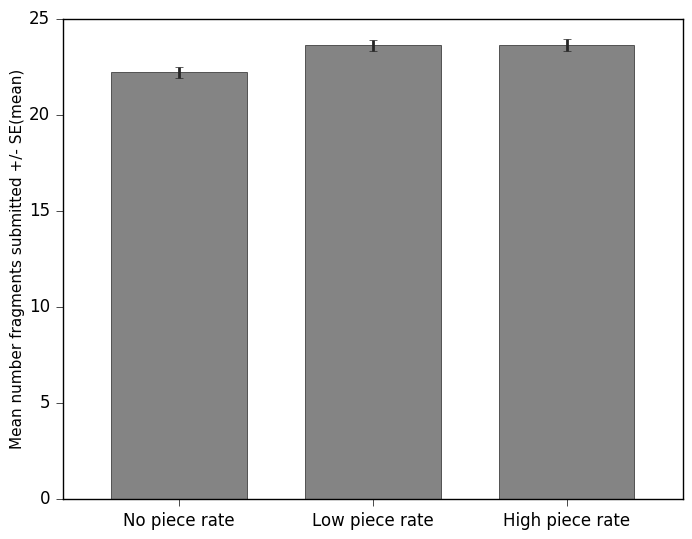

In [19]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100, facecolor='w')
counter_first['mean'].plot(yerr=counter_first['sem'], ax=ax, error_kw=error_kw, **bar_kw)
ax.set_ylabel("Mean number fragments submitted +/- SE(mean)", **ylab_kw)
ax.set_xlabel('')
ax.set_ylim(0, 25)
ax.tick_params(rotation = 0, **tick_kw)

path = os.path.join(
    FIGURES_FOLDER, 
    'experiment_1',
    'counter_real_first.pdf'
)
fig.savefig(path, bbox_inches='tight')

#### Compare average number of fragments submitted by leadership technique

In [20]:
counter_second = grouped_second['Counter_real']\
    .agg(['mean', 'sem', 'count'])\
    
counter_second.style.format({'mean':'{:.2f}', 'sem':'{:.2f}'})

,mean,sem,count
Leadership_technique,,,
No message,23.66,0.32,897
Praise,22.45,0.31,890
Reference point,23.32,0.27,893


####  Pairwise T-test of mean differences for number of fragments submitted by leadership technique

In [21]:
mct = MultiComparison(df['Counter_real'], df['Leadership_technique'])
mct.allpairtest(stats.ttest_ind, method='Holm')[0]

group1,group2,stat,pval,pval_corr,reject
No message,Praise,2.7416,0.0062,0.0185,True
No message,Reference point,0.7977,0.4251,0.4251,False
Praise,Reference point,-2.1349,0.0329,0.0658,False


####  Pairwise variance comparisson test for number of fragments submitted by leadership technique

In [22]:
mct.allpairtest(stats.levene, method='Holm')[0]

group1,group2,stat,pval,pval_corr,reject
No message,Praise,0.2154,0.6426,0.6426,False
No message,Reference point,20.4256,0.0,0.0,True
Praise,Reference point,17.938,0.0,0.0,True


#### Plot average number of submissions by leadership technique

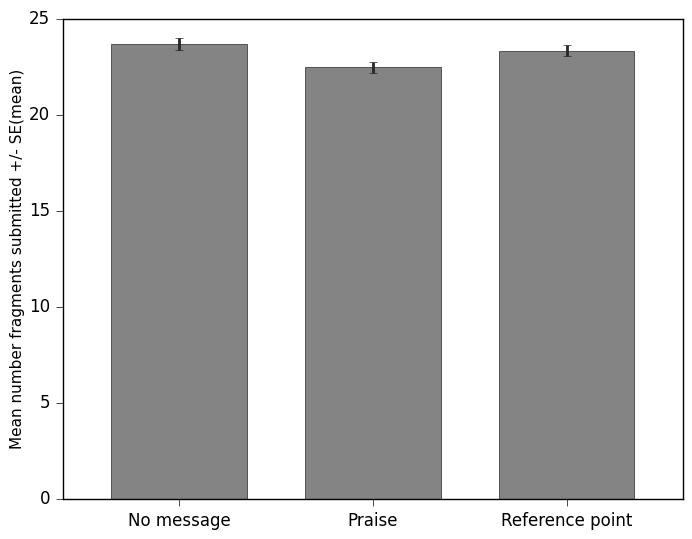

In [23]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100, facecolor='w')
counter_second['mean'].plot(yerr=counter_second['sem'], ax=ax, error_kw=error_kw, **bar_kw)
ax.set_ylabel("Mean number fragments submitted +/- SE(mean)", **ylab_kw)
ax.set_xlabel('')
ax.set_ylim(0, 25)
ax.tick_params(rotation=0, **tick_kw)

path = os.path.join(
    FIGURES_FOLDER, 
    'experiment_1',
    'counter_real_second.pdf'
)
fig.savefig(path, bbox_inches='tight')

#### Table 3: Treatment effects on quantity <a id='quantity'></a>

In [24]:
regs = {}
regs['reg1'] = 'Counter_real ~ Low_piece_rate + High_piece_rate + Praise + Reference_point'
regs['reg2'] = 'Counter_real ~ (Low_piece_rate + High_piece_rate) * (Praise + Reference_point)'
regs['reg3'] = regs['reg2'] + ' + Age + Female + Education + Mobile_device + Latin_med'

ols_results = [smf.ols(formula=v, data=df).fit(cov_type='HC3') for v in regs.values()]

order = [
    'Low_piece_rate',
    'High_piece_rate',
    'Praise',
    'Reference_point',
    'Low_piece_rate:Praise',
    'High_piece_rate:Praise',
    'Low_piece_rate:Reference_point',
    'High_piece_rate:Reference_point',
    'Age',
    'Female',
    'Education',
    'Mobile_device',
    'Latin_med',
    'Intercept',
]

auxiliary = {
    'N': lambda x: f'{x.nobs:.0f}',
    'F': lambda x: f'{x.fvalue:.3f}', 
    'P(>F)': lambda x: f'{x.f_pvalue:.3f}',
}

ols_quant = summary_col(
    ols_results,
    stars=True,
    info_dict=auxiliary,
    float_format='%.3f',
    regressor_order=order
)

ols_quant = ols_quant\
    .tables[0]\
    .rename(mapper=lambda x: x.replace('_', ' ').replace(':', ' * ').capitalize(), axis=0)\
    .rename(mapper=lambda x: x.capitalize().split()[0].replace('_', ' '), axis=1)\
    .rename({'Counter real': 'No. fragments'}, axis=1)\
    .rename({'Latin med': 'Latin'}, axis=0)\
    .rename_axis('Dependent variable:', axis=1)

path = os.path.join(
    TABLES_FOLDER,
    'experiment_1',
    'ols_quantity.tex'
)

ols_quant.to_latex(
    path,
    bold_rows=False,
    float_format="%.3f"
)

ols_quant

Dependent variable:,No. fragments,No. fragments,No. fragments
Low piece rate,1.398***,1.950**,1.978***
,(0.422),(0.781),(0.750)
High piece rate,1.418***,2.190***,1.968***
,(0.415),(0.738),(0.720)
Praise,-1.215***,-1.075,-1.260*
,(0.439),(0.731),(0.705)
Reference point,-0.332,0.847,0.781
,(0.417),(0.691),(0.671)
Low piece rate * praise,,-0.272,-0.474
,,(1.084),(1.044)


In [25]:
anova_lm(*ols_results, robust='hc3')

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2675.0,212086.898,0.0,NaN,NaN,NaN
1,2671.0,211643.676,4.0,443.223,1.507,1.974e-01
2,2666.0,196013.046,5.0,15630.630,42.519,2.864e-42


#### Difference between Low- and High piece rate estimate

In [26]:
formula = 'Counter_real ~ Low_piece_rate + High_piece_rate + Praise + Reference_point'
ols = smf.ols(formula=formula, data=df).fit(cov_type='HC3')

hypotheses = """Low_piece_rate - High_piece_rate = 0"""
f_test = ols.f_test(hypotheses)
f_test.summary()

'<F test: F=array([[0.00211389]]), p=0.9633319464151237, df_denom=2.68e+03, df_num=1>'

#### Effect of introducing monetary incentives on reference points

In [27]:
formula = 'Counter_real ~ (Low_piece_rate + High_piece_rate) * (Praise + Reference_point)'
ols = smf.ols(formula=formula, data=df).fit(cov_type='HC3')

hypotheses = """
    Low_piece_rate + Low_piece_rate:Reference_point + 
    High_piece_rate + High_piece_rate:Reference_point
"""
f_test = ols.f_test(hypotheses)
f_test.summary()

'<F test: F=array([[0.27104836]]), p=0.6026725444236444, df_denom=2.67e+03, df_num=1>'

In [28]:
!jupyter nbconvert --output-dir='./docs' --to html 4_treatment_effects_quantity.ipynb

[NbConvertApp] Converting notebook 4_treatment_effects_quantity.ipynb to html
[NbConvertApp] Writing 1080497 bytes to docs/4_treatment_effects_quantity.html
